In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Salary.csv')

In [3]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


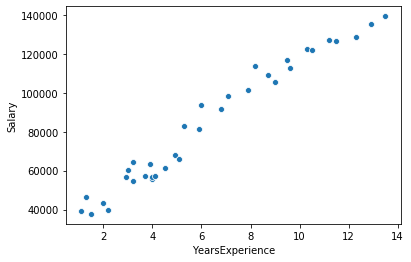

In [4]:
sns.scatterplot(df['YearsExperience'],df['Salary'])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
X=df[['YearsExperience']]
y=df[['Salary']]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.948425676671226

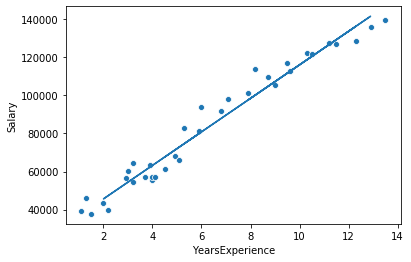

In [8]:
y_pred=lr.predict(X_test)
sns.scatterplot(df['YearsExperience'],df['Salary'])
plt.plot(X_test,y_pred)
plt.show()

In [10]:
def pred_sal(years):
    return lr.predict([[years]])[0][0]
s=int(input('Enter the age experience: '))
sal=pred_sal(s)

Enter the age experience: 


ValueError: invalid literal for int() with base 10: ''

In [15]:
from flask import Flask,request
app = Flask(__name__)
@app.route('/predict',methods=['POST'])
def pred_sal():
    year=float(request.form['years'])
    return str("The salary of employee will be: {:.0f}".format(lr.predict([[year]])[0][0]))
    
if __name__=='__main__':
    app.run(port=5050)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5050/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Nov/2019 22:10:52] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [26/Nov/2019 22:10:55] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [26/Nov/2019 22:11:08] "POST /predict HTTP/1.1" 200 -
